In [114]:
#import all libraries and package

import numpy as np 
import pandas as pd
import string
from pandas import read_csv
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
import warnings
warnings.filterwarnings('ignore')


# Task1: Data Loading and data preparation

## Data Loading

In [115]:
#specify column's name

col_x=["website_name", "text"]
col_y=["is_positive_sentiment"]

In [116]:
#load the dataset (train and test)

X_train_raw=pd.read_csv('x_train.csv', names=col_x)
y_train=pd.read_csv('y_train.csv', names=col_y)
X_test_raw=pd.read_csv('x_test.csv', names=col_x)
y_test=pd.read_csv('y_test.csv', names=col_y)

In [117]:
#explore data's shape

print("X_train shape:" , X_train_raw.shape)
print("y_train shape:" , y_train.shape)
print("X_test  shape:" , X_test_raw.shape)
print("y_test  shape:" , y_test.shape)

X_train shape: (2400, 2)
y_train shape: (2400, 1)
X_test  shape: (600, 2)
y_test  shape: (600, 1)


## Data cleansing and standardization

In [118]:
#check null in X_train
X_train_raw.isnull().values.any()
X_train_raw.isnull().sum()

website_name    0
text            0
dtype: int64

In [119]:
#check null in X_test
X_test_raw.isnull().values.any()
X_test_raw.isnull().sum()

website_name    0
text            0
dtype: int64

In [120]:
#check null in y_test
y_test.isnull().values.any()
y_test.isnull().sum()

is_positive_sentiment    0
dtype: int64

In [121]:
#check null in y_train
y_train.isnull().values.any()
y_train.isnull().sum()

is_positive_sentiment    0
dtype: int64

In [122]:
X_train_raw.head()

,website_name,text
0,amazon,Oh and I forgot to also mention the weird colo...
1,amazon,THAT one didn't work either.
2,amazon,Waste of 13 bucks.
3,amazon,"Product is useless, since it does not have eno..."
4,amazon,None of the three sizes they sent with the hea...


In [123]:
y_train.head()

,is_positive_sentiment
0,0
1,0
2,0
3,0
4,0


In [124]:
X_test_raw.head()

,website_name,text
0,amazon,It only recognizes the Phone as its storage de...
1,amazon,Disappointing accessory from a good manufacturer.
2,amazon,The one big drawback of the MP3 player is that...
3,amazon,This particular model would not work with my M...
4,amazon,If the two were seperated by a mere 5+ ft I st...


In [125]:
y_test.head()

,is_positive_sentiment
0,0
1,0
2,0
3,0
4,0


In [126]:
X_train_raw.describe()

,website_name,text
count,2400,2400
unique,3,2388
top,amazon,Great phone!.
freq,800,2


In [127]:
#find duplicate row in X_train
print("duplicate row in X_train:",X_train_raw.duplicated().sum())

duplicate row in X_train: 12


In [128]:
# display the duplicate rows in X_train

X_train_duplicated_row=X_train_raw.duplicated()
print(X_train_raw[X_train_duplicated_row])

     website_name                               text
583        amazon                      Great phone!.
668        amazon   Excellent product for the price.
679        amazon                       Works great.
680        amazon                       Great phone.
718        amazon                       Great Phone.
748        amazon                      Works great!.
1069         imdb                 Not recommended.  
1486         imdb   Definitely worth checking out.  
1534         imdb                             10-Oct
1921         yelp  I would not recommend this place.
1950         yelp                             #NAME?
2130         yelp                 I love this place.


In [129]:
y_train.value_counts()

is_positive_sentiment
0                        1200
1                        1200
dtype: int64

In [130]:
#remove duplicate row in X_train and y_train
X_train_raw = X_train_raw.drop_duplicates()
y_train = y_train.loc[X_train_raw.index]

In [131]:
#find duplicate row in X_test
print("duplicate row in X_test:",X_test_raw.duplicated().sum())

duplicate row in X_test: 2


In [132]:
# display the duplicate rows in X_test
X_test_duplicated_row=X_test_raw.duplicated()
print(X_test_raw[X_test_duplicated_row])

    website_name                     text
49        amazon  Don't buy this product.
596         yelp                   #NAME?


In [133]:
y_test.value_counts()

is_positive_sentiment
0                        300
1                        300
dtype: int64

In [134]:
#remove duplicate row in X_test and y_test
X_test_raw = X_test_raw.drop_duplicates()
y_test = y_test.loc[X_test_raw.index]

In [135]:
#reset index
X_train_raw = X_train_raw.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

In [136]:
y_test.value_counts()

is_positive_sentiment
0                        299
1                        299
dtype: int64

In [137]:
#replace #NAME? with ""
X_train_raw['text'] = X_train_raw['text'].replace("#NAME?", "")

In [138]:
#replace #NAME? with ""
X_test_raw['text'] = X_test_raw['text'].replace("#NAME?","")

In [139]:
#remove punctuation

def remove_punctuation(text):
    if pd.isnull(text):  # Check if the text is NaN
        return text
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

X_train_raw['text'] = X_train_raw['text'].apply(remove_punctuation)
X_test_raw['text'] = X_test_raw['text'].apply(remove_punctuation)


In [140]:
# change to lowercase
X_train_raw['text'] = X_train_raw['text'].str.lower()
X_test_raw['text'] = X_test_raw['text'].str.lower()

In [141]:
X_train_raw.head()

,website_name,text
0,amazon,oh and i forgot to also mention the weird colo...
1,amazon,that one didnt work either
2,amazon,waste of 13 bucks
3,amazon,product is useless since it does not have enou...
4,amazon,none of the three sizes they sent with the hea...


In [142]:
X_test_raw.head()

,website_name,text
0,amazon,it only recognizes the phone as its storage de...
1,amazon,disappointing accessory from a good manufacturer
2,amazon,the one big drawback of the mp3 player is that...
3,amazon,this particular model would not work with my m...
4,amazon,if the two were seperated by a mere 5 ft i sta...


In [143]:
train_df = pd.concat([X_train_raw,y_train], axis=1)
train_df.head()

,website_name,text,is_positive_sentiment
0,amazon,oh and i forgot to also mention the weird colo...,0
1,amazon,that one didnt work either,0
2,amazon,waste of 13 bucks,0
3,amazon,product is useless since it does not have enou...,0
4,amazon,none of the three sizes they sent with the hea...,0


In [144]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2388 entries, 0 to 2387
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   website_name           2388 non-null   object
 1   text                   2388 non-null   object
 2   is_positive_sentiment  2388 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 56.1+ KB


## Data exploratory

For data exploratory, there are mainly referenced from https://www.kaggle.com/code/adityaghuse/sentiment-analysis#Decoding-Movie-Reviews:-What-Words-and-Phrases-Reveal-About-reviews

In [145]:
from collections import Counter

# Filter the DataFrame to get only negative reviews
negative_reviews =  train_df[train_df['is_positive_sentiment'] == 0]
negative_sentences = negative_reviews['text']

# Tokenize negative reviews
negative_words = [word for review in negative_sentences for word in review.split()]

# Count word frequencies in negative reviews
negative_word_counts = Counter(negative_words)

# Get the top 25 words for negative sentiment
top_negative_words = negative_word_counts.most_common(25)


In [146]:
# Filter the DataFrame to get only positive reviews
positive_reviews = train_df[train_df['is_positive_sentiment'] == 1]
positive_sentences = positive_reviews['text']

# Tokenize positive reviews
positive_words = [word for review in positive_sentences for word in review.split()]

# Count word frequencies in positive reviews
positive_word_counts = Counter(positive_words)

# Get the top 25 words for positive sentiment
top_positive_words = positive_word_counts.most_common(25)

### Plot the top words

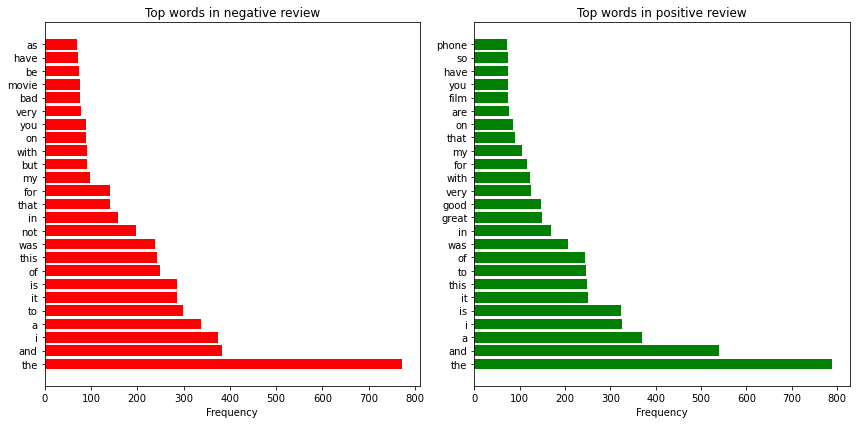

In [147]:

# Extract the top words 
top_negative_words, negative_counts = zip(*top_negative_words)
top_positive_words, positive_counts = zip(*top_positive_words)

# Create subplots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.barh(top_negative_words, negative_counts, color='red')
plt.xlabel('Frequency')
plt.title('Top words in negative review')

plt.subplot(1, 2, 2)
plt.barh(top_positive_words, positive_counts, color='green')
plt.xlabel('Frequency')
plt.title('Top words in positive review')

plt.tight_layout()
plt.show()

### Plot words count distribution

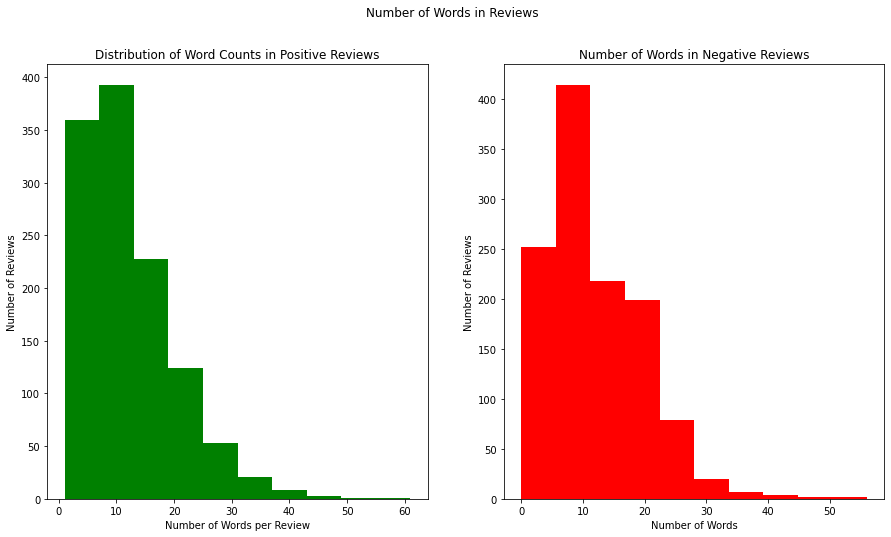

In [148]:
# Create subplots for positive and negative sentiments
figure, (pos_ax, neg_ax) = plt.subplots(1, 2, figsize=(15, 8))


pos_reviews = train_df[train_df['is_positive_sentiment'] == 1]  
pos_word_lengths = pos_reviews['text'].str.split().apply(lambda words: len(words))
pos_ax.hist(pos_word_lengths, color='green')
pos_ax.set_title('Distribution of Word Counts in Positive Reviews')
pos_ax.set_xlabel('Number of Words per Review')
pos_ax.set_ylabel('Number of Reviews')

# Negative Sentiment
neg_reviews = train_df[train_df['is_positive_sentiment'] == 0]
neg_word = neg_reviews['text'].str.split().apply(lambda words: len(words))
neg_ax.hist(neg_word, color='red')
neg_ax.set_title('Number of Words in Negative Reviews')
neg_ax.set_xlabel('Number of Words')
neg_ax.set_ylabel('Number of Reviews')

figure.suptitle('Number of Words in Reviews')
plt.show()


In [149]:
#Extract word by using Countvectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

### Positive review exploration

In [150]:
import plotly.express as px

# Get the most common unigrams in positive sentiment reviews
most_common_uni = get_top_text_ngrams(train_df[train_df['is_positive_sentiment'] == 1]['text'], 20, 1)
most_common_uni = dict(most_common_uni)


# Create a DataFrame to store the common words
temp = pd.DataFrame(columns=["Common_words", 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())

# Create a bar plot using Plotly Express
fig = px.bar(temp, x="Count", y="Common_words", title='Common Words in Positive Reviews',
             orientation='h', width=500, height=500, color='Common_words')

fig.show()

In [151]:
# Get the most common bigrams in positive review
most_common_bigrams = get_top_text_ngrams(train_df[train_df['is_positive_sentiment'] == 1]['text'], 20, 2)
most_common_bigrams = dict(most_common_bigrams)

# Create a DataFrame to store the common bigram words
temp = pd.DataFrame(columns=["Common_bigrams", 'Count'])
temp["Common_bigrams"] = list(most_common_bigrams.keys())
temp["Count"] = list(most_common_bigrams.values())

# Create a bar plot using Plotly Express
fig = px.bar(temp, x="Count", y="Common_bigrams", title='Common Bigrams in Positive Reviews',
             orientation='h', width=500, height=500, color='Common_bigrams')

fig.show()

In [152]:
# Get the most common bigrams in positive review
most_common_trigrams =  get_top_text_ngrams(train_df[train_df['is_positive_sentiment'] == 1]['text'], 20, 3)
most_common_trigrams = dict(most_common_trigrams)

# Create a DataFrame to store the common trigram words
temp = pd.DataFrame(columns=["Common_trigrams", 'Count'])
temp["Common_trigrams"] = list(most_common_trigrams.keys())
temp["Count"] = list(most_common_trigrams.values())

# Create a bar plot using Plotly Express
fig = px.bar(temp, x="Count", y="Common_trigrams", title='Common Trigrams in Positive Reviews',
             orientation='h', width=500, height=500, color='Common_trigrams')

fig.show()

In [153]:
# Get the most common unigrams (single words) in negative sentiment reviews
most_common_uni = get_top_text_ngrams(train_df[train_df['is_positive_sentiment'] == 0]['text'], 20, 1)
most_common_uni = dict(most_common_uni)


# Create a DataFrame to store the common words and their counts
temp = pd.DataFrame(columns=["Common_words", 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())

# Create a bar plot using Plotly Express
fig = px.bar(temp, x="Count", y="Common_words", title='Common Words in Negative Reviews',
             orientation='h', width=500, height=500, color='Common_words')

fig.show()

### Negative review exploration

In [154]:
# Get the most common bigrams in negative reviews
most_common_bigrams = get_top_text_ngrams(train_df[train_df['is_positive_sentiment'] == 0]['text'], 20, 2)
most_common_bigrams = dict(most_common_bigrams)

# Create a DataFrame to store the common bigrams
temp = pd.DataFrame(columns=["Common_bigrams", 'Count'])
temp["Common_bigrams"] = list(most_common_bigrams.keys())
temp["Count"] = list(most_common_bigrams.values())

# Create a bar plot using Plotly Express
fig = px.bar(temp, x="Count", y="Common_bigrams", title='Common Bigrams in Negative Reviews',
             orientation='h', width=500, height=500, color='Common_bigrams')

fig.show()

In [155]:
 #Get the most common trigrams in negative reviews
most_common_trigrams =  get_top_text_ngrams(train_df[train_df['is_positive_sentiment'] == 0]['text'], 20, 3)
most_common_trigrams = dict(most_common_trigrams)

# Create a DataFrame to store the common trigrams
temp = pd.DataFrame(columns=["Common_trigrams", 'Count'])
temp["Common_trigrams"] = list(most_common_trigrams.keys())
temp["Count"] = list(most_common_trigrams.values())

# Create a bar plot using Plotly Express
fig = px.bar(temp, x="Count", y="Common_trigrams", title='Common Trigrams in Negative Reviews',
             orientation='h', width=500, height=500, color='Common_trigrams')

fig.show()

# Task2: Feature representation

## CountVectorizer

In [156]:
from sklearn.feature_extraction.text import CountVectorizer

In [157]:
#extract feature from text

text = X_train_raw['text']
cvectorizer = CountVectorizer(ngram_range = (1, 2), stop_words='english', min_df = 0.002,max_df = 0.5)
X_traincv = cvectorizer.fit_transform(text)

In [158]:
#vocabulary size and feature name

print("vocabulary size:",len(cvectorizer.get_feature_names_out()))
print(cvectorizer.get_feature_names_out())


vocabulary size: 551
['10' '12' '20' '40' 'absolutely' 'acting' 'action' 'actor' 'actors'
 'actually' 'ago' 'amazing' 'amazon' 'amp' 'annoying' 'anytime'
 'anytime soon' 'area' 'arrived' 'art' 'ask' 'atmosphere' 'attentive'
 'audio' 'authentic' 'average' 'avoid' 'away' 'awesome' 'awful' 'bad'
 'bar' 'barely' 'bars' 'basically' 'battery' 'battery life' 'beautiful'
 'beef' 'beer' 'believable' 'believe' 'belt' 'best' 'better' 'big' 'bit'
 'black' 'bland' 'blue' 'bluetooth' 'bluetooth headset' 'boring' 'bother'
 'bought' 'breakfast' 'brilliant' 'bring' 'broke' 'buffet' 'burger'
 'business' 'buttons' 'buy' 'buying' 'cable' 'calls' 'came' 'camera' 'car'
 'care' 'case' 'cases' 'cast' 'casting' 'cell' 'cell phone' 'certainly'
 'character' 'characters' 'charge' 'charger' 'charging' 'charm' 'cheap'
 'check' 'chicken' 'child' 'chips' 'cinema' 'cinematography' 'clean'
 'clear' 'clever' 'close' 'cold' 'color' 'come' 'comes' 'comfortable'
 'coming' 'company' 'completely' 'computer' 'considering' 'co

In [159]:
#create dataframe

X_traincv_df = pd.DataFrame(X_traincv.toarray(),columns=list(cvectorizer.get_feature_names_out()))
X_traincv_df

,10,12,20,40,absolutely,acting,action,actor,actors,actually,...,worst,worth,wouldnt,writing,written,wrong,year,years,youd,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2383,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2384,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2385,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2386,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## TfidfVectorizer

In [160]:
#extract feature from text

from sklearn.feature_extraction.text import TfidfVectorizer
tfid_vectorizer = TfidfVectorizer(ngram_range = (1, 2), stop_words='english',min_df = 0.002 ,max_df = 0.5)
X_train_tfid = tfid_vectorizer.fit_transform(text)


In [161]:
#vocabulary size and feature name

print("vocabulary size:",len(tfid_vectorizer.get_feature_names_out()))
print(tfid_vectorizer.get_feature_names_out())

vocabulary size: 551
['10' '12' '20' '40' 'absolutely' 'acting' 'action' 'actor' 'actors'
 'actually' 'ago' 'amazing' 'amazon' 'amp' 'annoying' 'anytime'
 'anytime soon' 'area' 'arrived' 'art' 'ask' 'atmosphere' 'attentive'
 'audio' 'authentic' 'average' 'avoid' 'away' 'awesome' 'awful' 'bad'
 'bar' 'barely' 'bars' 'basically' 'battery' 'battery life' 'beautiful'
 'beef' 'beer' 'believable' 'believe' 'belt' 'best' 'better' 'big' 'bit'
 'black' 'bland' 'blue' 'bluetooth' 'bluetooth headset' 'boring' 'bother'
 'bought' 'breakfast' 'brilliant' 'bring' 'broke' 'buffet' 'burger'
 'business' 'buttons' 'buy' 'buying' 'cable' 'calls' 'came' 'camera' 'car'
 'care' 'case' 'cases' 'cast' 'casting' 'cell' 'cell phone' 'certainly'
 'character' 'characters' 'charge' 'charger' 'charging' 'charm' 'cheap'
 'check' 'chicken' 'child' 'chips' 'cinema' 'cinematography' 'clean'
 'clear' 'clever' 'close' 'cold' 'color' 'come' 'comes' 'comfortable'
 'coming' 'company' 'completely' 'computer' 'considering' 'co

In [162]:
X_train_tfid.shape

(2388, 551)

In [163]:
#convert to dataframe
X_train_tfid_df = pd.DataFrame(X_train_tfid.toarray(), columns=list(tfid_vectorizer.get_feature_names_out()))
X_train_tfid_df

,10,12,20,40,absolutely,acting,action,actor,actors,actually,...,worst,worth,wouldnt,writing,written,wrong,year,years,youd,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [164]:
#transform X_test
X_test_tfid = tfid_vectorizer.transform(X_test_raw['text'])

In [165]:
#create dataframe for X_test
X_test_tfid_df = pd.DataFrame(X_test_tfid.toarray(),columns=list(cvectorizer.get_feature_names_out()))
X_test_tfid_df

,10,12,20,40,absolutely,acting,action,actor,actors,actually,...,worst,worth,wouldnt,writing,written,wrong,year,years,youd,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Task3: Classification and Evaluation

In [166]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean, stdev

In [167]:
# identify model and K-fold number
models = [MultinomialNB()]
kfold_number = [3, 5, 10]

## Data splitting, K-fold cross validation

In [168]:
#looping to see Train and Validation size for differnt K-fold number

for k in kfold_number:
    print(f"**Number of Folds: {k}**")
    print("-------------------------")
    kf = KFold(n_splits=k, random_state=1, shuffle=True)

    for fold, (train_index, test_index) in enumerate(kf.split(X_train_tfid_df), start=1):
        print(f"Fold {fold}:")
        print(f"   Train size: {len(train_index)}")
        print(f"   Validation size: {len(test_index)}\n")

**Number of Folds: 3**
-------------------------
Fold 1:
   Train size: 1592
   Validation size: 796

Fold 2:
   Train size: 1592
   Validation size: 796

Fold 3:
   Train size: 1592
   Validation size: 796

**Number of Folds: 5**
-------------------------
Fold 1:
   Train size: 1910
   Validation size: 478

Fold 2:
   Train size: 1910
   Validation size: 478

Fold 3:
   Train size: 1910
   Validation size: 478

Fold 4:
   Train size: 1911
   Validation size: 477

Fold 5:
   Train size: 1911
   Validation size: 477

**Number of Folds: 10**
-------------------------
Fold 1:
   Train size: 2149
   Validation size: 239

Fold 2:
   Train size: 2149
   Validation size: 239

Fold 3:
   Train size: 2149
   Validation size: 239

Fold 4:
   Train size: 2149
   Validation size: 239

Fold 5:
   Train size: 2149
   Validation size: 239

Fold 6:
   Train size: 2149
   Validation size: 239

Fold 7:
   Train size: 2149
   Validation size: 239

Fold 8:
   Train size: 2149
   Validation size: 239

Fold

## Hyperparameters tuning

In [169]:
#identify range of model hyperparameter

parameters = {
            "alpha": [1e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0],
            "fit_prior": [True, False],
            }


Model: MultinomialNB

K-Folds: 3
Best hyperparameters: {'alpha': 2.0, 'fit_prior': False}
Best score: 0.77806
Best estimator: MultinomialNB(alpha=2.0, fit_prior=False)


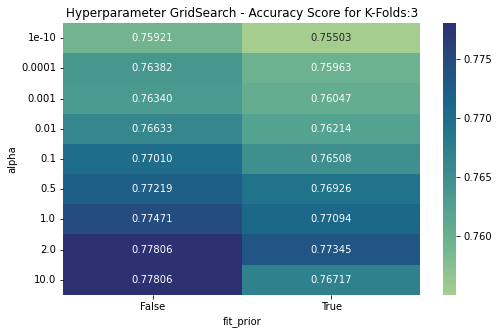

Confusion Matrix for  KFold(n_splits=3, random_state=1, shuffle=True)
[[941 256]
 [274 917]]

Performance Metrics from k fold for k= 3
Accuracy: 0.77806, Precision: 0.7818, Recall: 0.7699, F1-score: 0.7758
-----------------------------------------------------------------------------------
K-Folds: 5
Best hyperparameters: {'alpha': 0.5, 'fit_prior': False}
Best score: 0.78182
Best estimator: MultinomialNB(alpha=0.5, fit_prior=False)


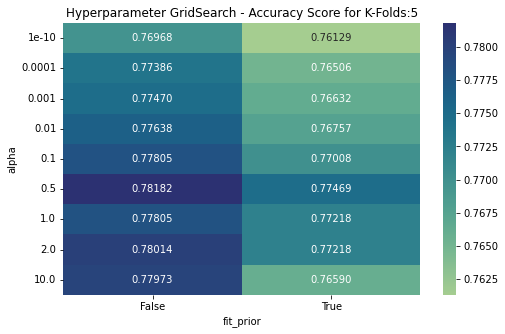

Confusion Matrix for  KFold(n_splits=5, random_state=1, shuffle=True)
[[954 243]
 [278 913]]

Performance Metrics from k fold for k= 5
Accuracy: 0.78183, Precision: 0.7898, Recall: 0.7666, F1-score: 0.7780
-----------------------------------------------------------------------------------
K-Folds: 10
Best hyperparameters: {'alpha': 2.0, 'fit_prior': False}
Best score: 0.78140
Best estimator: MultinomialNB(alpha=2.0, fit_prior=False)


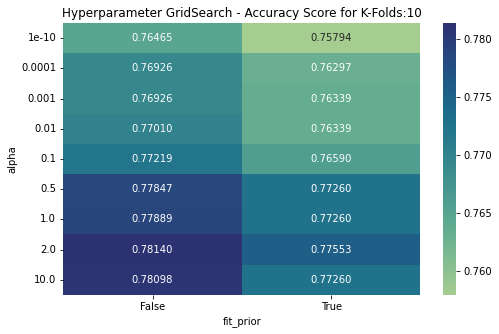

Confusion Matrix for  KFold(n_splits=10, random_state=1, shuffle=True)
[[950 247]
 [275 916]]

Performance Metrics from k fold for k= 10
Accuracy: 0.78141, Precision: 0.7876, Recall: 0.7691, F1-score: 0.7782
-----------------------------------------------------------------------------------


In [170]:
#Perform model performance estimation by Cross-validation & GridSearch

#loop over (each) model first 
for model in models:
    model_name = type(model).__name__
    print(f"\nModel: {model_name}\n")
    
    #loop over each k number
    for k in kfold_number:
        kf = KFold(n_splits=k, random_state=1, shuffle=True)
        model_grid = GridSearchCV(model, parameters, cv= kf, n_jobs=-1,scoring='accuracy')
        model_grid.fit(X_train_tfid_df, y_train)
        
       
        # Perform cross-validation
        print("K-Folds:", k)
        print("Best hyperparameters:", model_grid.best_params_)
        print("Best score:", format(model_grid.best_score_, ".5f"))
        print("Best estimator:", model_grid.best_estimator_)
        
        
        #Perform Confusion Matrix and model performance from each K-Fold Cross-Validation
        
        y_val_pred = cross_val_predict(model_grid.best_estimator_, X_train_tfid_df, y_train, cv=kf)
        conf_mat = confusion_matrix(y_train, y_val_pred)
        
        accuracy_val = accuracy_score(y_train, y_val_pred)
        precision_val = precision_score(y_train, y_val_pred)
        recall_val = recall_score(y_train, y_val_pred)
        f1_val = f1_score(y_train, y_val_pred)
        
        
        #Plot and display model performance

        result_df = f"result_df_{k}"
        results_df = pd.DataFrame(model_grid.cv_results_)
        
        
        scores_fig = results_df.pivot(index='param_alpha', columns= "param_fit_prior", values='mean_test_score')
        plt.figure(figsize=(8, 5))
        sns.heatmap(scores_fig, annot=True, fmt=".5f" ,cmap="crest")
        plt.title(f"Hyperparameter GridSearch - Accuracy Score for K-Folds:{k}")
        plt.xlabel("fit_prior")
        plt.ylabel("alpha")
        plt.show()
        
        print("Confusion Matrix for ", kf)
        print(conf_mat)
        print(f"\nPerformance Metrics from k fold for k=",k)
        print(f"Accuracy: {accuracy_val:.5f}, Precision: {precision_val:.4f}, Recall: {recall_val:.4f}, F1-score: {f1_val:.4f}")
        print("-----------------------------------------------------------------------------------")

## Performance from Cross Validation

In [171]:
#select best estimator (K=5) to see model performance from cross validation

kf_val = KFold(n_splits=5, random_state=1, shuffle=True)
y_pred_val = cross_val_predict(model_grid.best_estimator_, X_train_tfid_df, y_train, cv=kf_val)

In [172]:
y_pred_val_df = pd.DataFrame(y_pred_val, columns=['prediction'])
y_pred_val_df.describe()

,prediction
count,2388.000000
mean,0.489950
std,0.500004
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [173]:
y_pred_val_df.value_counts()

prediction
0             1218
1             1170
dtype: int64

In [174]:
#create dataframe to see performance in further steps
train_perf_df = pd.concat([X_train_raw,y_train,y_pred_val_df], axis=1)
train_perf_df.head()

,website_name,text,is_positive_sentiment,prediction
0,amazon,oh and i forgot to also mention the weird colo...,0,1
1,amazon,that one didnt work either,0,0
2,amazon,waste of 13 bucks,0,0
3,amazon,product is useless since it does not have enou...,0,0
4,amazon,none of the three sizes they sent with the hea...,0,1


In [175]:
train_perf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2388 entries, 0 to 2387
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   website_name           2388 non-null   object
 1   text                   2388 non-null   object
 2   is_positive_sentiment  2388 non-null   int64 
 3   prediction             2388 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 74.8+ KB


In [176]:
#assign correctness column (correct or wrong)

def correctness_column(df, sentiment_col, prediction_col):


    conditions = [
        df[sentiment_col] == df[prediction_col],
        df[sentiment_col] != df[prediction_col]
    ]
    prediction = ['correct', 'wrong']

    df['correct/wrong prediction'] = np.select(conditions, prediction, default=np.nan)
    return df


In [177]:
train_perf_df = correctness_column(train_perf_df, 'is_positive_sentiment', 'prediction')
train_perf_df.head()

,website_name,text,is_positive_sentiment,prediction,correct/wrong prediction
0,amazon,oh and i forgot to also mention the weird colo...,0,1,wrong
1,amazon,that one didnt work either,0,0,correct
2,amazon,waste of 13 bucks,0,0,correct
3,amazon,product is useless since it does not have enou...,0,0,correct
4,amazon,none of the three sizes they sent with the hea...,0,1,wrong


In [178]:
train_perf_df['text'] = train_perf_df['text'].astype(str)

In [179]:
#count words lenght for each review

train_perf_df['word_lengths'] = train_perf_df['text'].apply(lambda text: len(text.split()))
train_perf_df.head()

,website_name,text,is_positive_sentiment,prediction,correct/wrong prediction,word_lengths
0,amazon,oh and i forgot to also mention the weird colo...,0,1,wrong,16
1,amazon,that one didnt work either,0,0,correct,5
2,amazon,waste of 13 bucks,0,0,correct,4
3,amazon,product is useless since it does not have enou...,0,0,correct,23
4,amazon,none of the three sizes they sent with the hea...,0,1,wrong,15


In [180]:
train_perf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2388 entries, 0 to 2387
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   website_name              2388 non-null   object
 1   text                      2388 non-null   object
 2   is_positive_sentiment     2388 non-null   int64 
 3   prediction                2388 non-null   int64 
 4   correct/wrong prediction  2388 non-null   object
 5   word_lengths              2388 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 112.1+ KB


In [181]:
#Answer this question: does it do better on longer sentences or shorter sentences?

#average word lengths
avg_word_lengths_train=train_perf_df["word_lengths"].mean()
print(round(avg_word_lengths_train,2))

11.85


In [182]:
#assign long/short column by average word lengths
train_perf_df['long/short sentence'] = ['long' if word_length >= avg_word_lengths_train else 'short' 
                                  for word_length in train_perf_df["word_lengths"]]

In [183]:
long_shot_performance_train=train_perf_df.groupby(['long/short sentence','correct/wrong prediction'])['correct/wrong prediction'].count()

In [184]:
#create new dataframe of short and long sentence for analysis

short_sentence_train = train_perf_df[train_perf_df['long/short sentence'] =='short']
long_sentence_train = train_perf_df[train_perf_df['long/short sentence'] =='long']


Performance Metrics for Short sentences in Train dataset:
Accuracy: 0.7922, Precision: 0.8057, Recall: 0.7800, F1-score: 0.7926


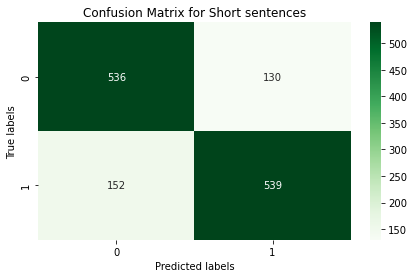

In [185]:
# Calculate and print evaluation metrics for short sentence
accuracy_short_train = accuracy_score(short_sentence_train["is_positive_sentiment"], short_sentence_train["prediction"])
precision_short_train = precision_score(short_sentence_train["is_positive_sentiment"], short_sentence_train["prediction"])
recall_short_train = recall_score(short_sentence_train["is_positive_sentiment"], short_sentence_train["prediction"])
f1_short_train = f1_score(short_sentence_train["is_positive_sentiment"], short_sentence_train["prediction"])
    
print(f"\nPerformance Metrics for Short sentences in Train dataset:")
print(f"Accuracy: {accuracy_short_train:.4f}, Precision: {precision_short_train:.4f}, Recall: {recall_short_train:.4f}, F1-score: {f1_short_train:.4f}")
    
# Plot the confusion matrix
plt.figure(figsize=(7, 4))
sns.heatmap(confusion_matrix(short_sentence_train["is_positive_sentiment"], short_sentence_train["prediction"]), annot=True, fmt="d", cmap='Greens')
plt.title(f'Confusion Matrix for Short sentences')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()



Performance Metrics for long sentences in Train:
Accuracy: 0.7643, Precision: 0.7565, Recall: 0.7580, F1-score: 0.7572


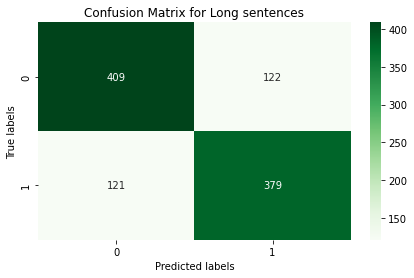

In [186]:
# Calculate and print evaluation metrics for long sentence
accuracy_long_train = accuracy_score(long_sentence_train["is_positive_sentiment"], long_sentence_train["prediction"])
precision_long_train = precision_score(long_sentence_train["is_positive_sentiment"], long_sentence_train["prediction"])
recall_long_train = recall_score(long_sentence_train["is_positive_sentiment"], long_sentence_train["prediction"])
f1_long_train = f1_score(long_sentence_train["is_positive_sentiment"], long_sentence_train["prediction"])
    
print(f"\nPerformance Metrics for long sentences in Train:")
print(f"Accuracy: {accuracy_long_train:.4f}, Precision: {precision_long_train:.4f}, Recall: {recall_long_train:.4f}, F1-score: {f1_long_train:.4f}")
    
# Plot the confusion matrix
plt.figure(figsize=(7, 4))
sns.heatmap(confusion_matrix(long_sentence_train["is_positive_sentiment"], long_sentence_train["prediction"]), annot=True, fmt="d", cmap='Greens')
plt.title(f'Confusion Matrix for Long sentences')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [187]:
#assign true/false status column 

def tf_status(df, sentiment_col, prediction_col):


    conditions = [
            (df[sentiment_col] == 0) & (df[prediction_col] == 0),  
            (df[sentiment_col] == 0) & (df[prediction_col] == 1),  
            (df[sentiment_col] == 1) & (df[prediction_col] == 0),  
            (df[sentiment_col] == 1) & (df[prediction_col] == 1),  
        
            ]
   
    prediction = [
            'True Negative (TN)',  
            'False Positive (FP)',  
            'False Negative (FN)',  
            'True Positive (TP)'    
            ]

    df['true/false status'] = np.select(conditions, prediction, default=np.nan)
    return df

In [188]:
train_perf_df = tf_status(train_perf_df, 'is_positive_sentiment', 'prediction')
train_perf_df.head()

,website_name,text,is_positive_sentiment,prediction,correct/wrong prediction,word_lengths,long/short sentence,true/false status
0,amazon,oh and i forgot to also mention the weird colo...,0,1,wrong,16,long,False Positive (FP)
1,amazon,that one didnt work either,0,0,correct,5,short,True Negative (TN)
2,amazon,waste of 13 bucks,0,0,correct,4,short,True Negative (TN)
3,amazon,product is useless since it does not have enou...,0,0,correct,23,long,True Negative (TN)
4,amazon,none of the three sizes they sent with the hea...,0,1,wrong,15,long,False Positive (FP)


In [189]:
#some data for FP
train_perf_df[train_perf_df['true/false status']=='False Positive (FP)'].head()

,website_name,text,is_positive_sentiment,prediction,correct/wrong prediction,word_lengths,long/short sentence,true/false status
0,amazon,oh and i forgot to also mention the weird colo...,0,1,wrong,16,long,False Positive (FP)
4,amazon,none of the three sizes they sent with the hea...,0,1,wrong,15,long,False Positive (FP)
22,amazon,i bought these hoping i could make my bluetoot...,0,1,wrong,20,long,False Positive (FP)
23,amazon,we have tried 2 units and they both failed wit...,0,1,wrong,13,long,False Positive (FP)
29,amazon,i would not recommend this item to anyone,0,1,wrong,8,short,False Positive (FP)


In [190]:
#some data for FN

train_perf_df[train_perf_df['true/false status']=='False Negative (FN)'].head()

,website_name,text,is_positive_sentiment,prediction,correct/wrong prediction,word_lengths,long/short sentence,true/false status
406,amazon,razr battery good buy,1,0,wrong,4,short,False Negative (FN)
407,amazon,car charger as well as ac charger are included...,1,0,wrong,19,long,False Negative (FN)
408,amazon,worth every penny,1,0,wrong,3,short,False Negative (FN)
410,amazon,after trying many many handsfree gadgets this ...,1,0,wrong,14,long,False Negative (FN)
412,amazon,plan on ordering from them again and again,1,0,wrong,8,short,False Negative (FN)


In [191]:
#group by long/short and TF status
train_perf_df.groupby(['long/short sentence'])["true/false status"].value_counts()

long/short sentence  true/false status  
long                 True Negative (TN)     409
                     True Positive (TP)     379
                     False Positive (FP)    122
                     False Negative (FN)    121
short                True Positive (TP)     539
                     True Negative (TN)     536
                     False Negative (FN)    152
                     False Positive (FP)    130
Name: true/false status, dtype: int64

In [192]:
#Answer this question: does it do better on a particular kind of review (amazon,imdb,yelp)?

#group to get total number
website_total_train=train_perf_df.groupby(['website_name'])['website_name'].count()
print(website_total_train)

website_name
amazon    794
imdb      797
yelp      797
Name: website_name, dtype: int64


In [193]:
#calculate overall accuracy percentage on each website
website_performance_train= train_perf_df.groupby(['website_name','correct/wrong prediction'])['correct/wrong prediction'].count()
percent_website_performance_train = (website_performance_train*100)/website_total_train
print(round(percent_website_performance_train,2))

website_name  correct/wrong prediction
amazon        correct                     78.72
              wrong                       21.28
imdb          correct                     76.66
              wrong                       23.34
yelp          correct                     78.67
              wrong                       21.33
dtype: float64


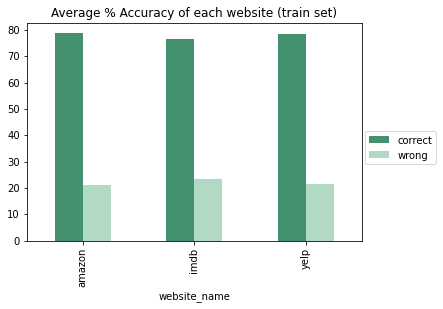

In [194]:
percent_website_performance_train.unstack().plot(kind="bar",color = ["#44916F","#B2D9C4"],title="Average % Accuracy of each website (train set)")
plt.legend(loc=(1.01,.35))

In [195]:
#Answer question: does it do better on sentences without negation words ("not", "didn't", "shouldn't", etc.)?

#identify negative words
negative_words = ["not", "didn't", "shouldn't","doesn't","wasn't","don't", "havn't","is't","can't","won't"]

train_perf_df['contains_negative'] = train_perf_df['text'].apply(lambda x: any(word in x.lower() for word in negative_words))
train_no_negative_df =train_perf_df[~train_perf_df['contains_negative']]


In [196]:
#total number of each website review (without negative words)
train_website_total_pos=train_no_negative_df.groupby(['website_name'])['website_name'].count()
print(train_website_total_pos)

website_name
amazon    697
imdb      717
yelp      691
Name: website_name, dtype: int64


In [197]:
#calculate overall accuracy percentage on each website

train_website_performance_pos = train_no_negative_df.groupby(['website_name','correct/wrong prediction'])['correct/wrong prediction'].count()
train_percent_website_performance_pos = (train_website_performance_pos*100)/train_website_total_pos

print(round(train_percent_website_performance_pos,2))

website_name  correct/wrong prediction
amazon        correct                     79.91
              wrong                       20.09
imdb          correct                     78.66
              wrong                       21.34
yelp          correct                     81.77
              wrong                       18.23
dtype: float64


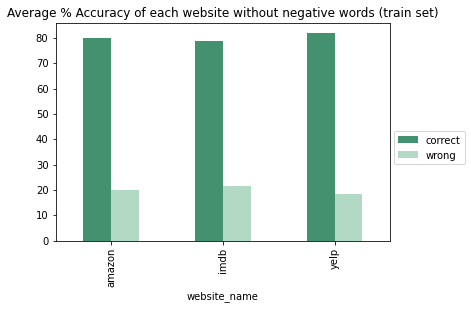

In [198]:
train_percent_website_performance_pos.unstack().plot(kind="bar",color = ["#44916F","#B2D9C4"],title="Average % Accuracy of each website without negative words (train set)")
plt.legend(loc=(1.01,.35))


## Final model training and testing

In [199]:
# Train the final model on entire training set from best estimator from above step

final_model = model_grid.best_estimator_
y_pred = final_model.predict(X_test_tfid_df)

In [200]:
print(y_pred)

[1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0
 1 0 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1
 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0
 1 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1
 0 0 0 1 0 1 0 0 0 0 1 1 

## Performance on testing set


Performance Metrics (test set) for MultinomialNB:
Accuracy: 0.7609, Precision: 0.7826, Recall: 0.7224, F1-score: 0.7513


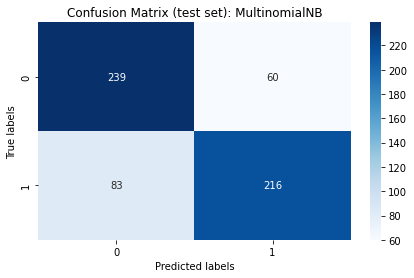

In [201]:
# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
    
print(f"\nPerformance Metrics (test set) for {model_name}:")
print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
    
# Plot the confusion matrix
plt.figure(figsize=(7, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap='Blues')
plt.title(f'Confusion Matrix (test set): {model_name}')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


In [202]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:",round(accuracy_score(y_test, y_pred),2))
print(classification_report(y_test, y_pred))

Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.74      0.80      0.77       299
           1       0.78      0.72      0.75       299

    accuracy                           0.76       598
   macro avg       0.76      0.76      0.76       598
weighted avg       0.76      0.76      0.76       598



In [203]:
y_pred_df = pd.DataFrame(y_pred, columns=['prediction'])

In [204]:
#create new dataframe from testing set
test_perf_df = pd.concat([X_test_raw,y_test,y_pred_df], axis=1)
test_perf_df.head()

,website_name,text,is_positive_sentiment,prediction
0,amazon,it only recognizes the phone as its storage de...,0.0,1.0
1,amazon,disappointing accessory from a good manufacturer,0.0,0.0
2,amazon,the one big drawback of the mp3 player is that...,0.0,0.0
3,amazon,this particular model would not work with my m...,0.0,0.0
4,amazon,if the two were seperated by a mere 5 ft i sta...,0.0,0.0


In [205]:
#assign correctness column for test set
test_perf_df= correctness_column(test_perf_df, 'is_positive_sentiment', 'prediction')
test_perf_df.head()

,website_name,text,is_positive_sentiment,prediction,correct/wrong prediction
0,amazon,it only recognizes the phone as its storage de...,0.0,1.0,wrong
1,amazon,disappointing accessory from a good manufacturer,0.0,0.0,correct
2,amazon,the one big drawback of the mp3 player is that...,0.0,0.0,correct
3,amazon,this particular model would not work with my m...,0.0,0.0,correct
4,amazon,if the two were seperated by a mere 5 ft i sta...,0.0,0.0,correct


In [206]:
#assign true/false column for test set
test_perf_df = tf_status(test_perf_df, 'is_positive_sentiment', 'prediction')
test_perf_df.head()

,website_name,text,is_positive_sentiment,prediction,correct/wrong prediction,true/false status
0,amazon,it only recognizes the phone as its storage de...,0.0,1.0,wrong,False Positive (FP)
1,amazon,disappointing accessory from a good manufacturer,0.0,0.0,correct,True Negative (TN)
2,amazon,the one big drawback of the mp3 player is that...,0.0,0.0,correct,True Negative (TN)
3,amazon,this particular model would not work with my m...,0.0,0.0,correct,True Negative (TN)
4,amazon,if the two were seperated by a mere 5 ft i sta...,0.0,0.0,correct,True Negative (TN)


In [207]:
test_perf_df['text'] = test_perf_df['text'].astype(str)

test_perf_df['word_lengths'] = test_perf_df['text'].str.split().apply(lambda words: len(words))

In [208]:
test_perf_df.head()

,website_name,text,is_positive_sentiment,prediction,correct/wrong prediction,true/false status,word_lengths
0,amazon,it only recognizes the phone as its storage de...,0.0,1.0,wrong,False Positive (FP),9
1,amazon,disappointing accessory from a good manufacturer,0.0,0.0,correct,True Negative (TN),6
2,amazon,the one big drawback of the mp3 player is that...,0.0,0.0,correct,True Negative (TN),30
3,amazon,this particular model would not work with my m...,0.0,0.0,correct,True Negative (TN),11
4,amazon,if the two were seperated by a mere 5 ft i sta...,0.0,0.0,correct,True Negative (TN),22


In [209]:
#answer question: does it do better on longer sentences or shorter sentences?

#calculate word length
avg_word_lengths=test_perf_df["word_lengths"].mean()
print(round(avg_word_lengths,2))

11.67


In [210]:
#assign long/short sentence column by average word length
test_perf_df['long/short sentence'] = ['long' if word_length >= avg_word_lengths else 'short' 
                                  for word_length in test_perf_df["word_lengths"]]

In [211]:
test_perf_df['long/short sentence'].value_counts()

short    346
long     254
Name: long/short sentence, dtype: int64

In [212]:
test_perf_df.head()

,website_name,text,is_positive_sentiment,prediction,correct/wrong prediction,true/false status,word_lengths,long/short sentence
0,amazon,it only recognizes the phone as its storage de...,0.0,1.0,wrong,False Positive (FP),9,short
1,amazon,disappointing accessory from a good manufacturer,0.0,0.0,correct,True Negative (TN),6,short
2,amazon,the one big drawback of the mp3 player is that...,0.0,0.0,correct,True Negative (TN),30,long
3,amazon,this particular model would not work with my m...,0.0,0.0,correct,True Negative (TN),11,short
4,amazon,if the two were seperated by a mere 5 ft i sta...,0.0,0.0,correct,True Negative (TN),22,long


In [213]:
#create new dataframe for short and long sentences
short_sentence = test_perf_df[test_perf_df['long/short sentence'] =='short']
long_sentence = test_perf_df[test_perf_df['long/short sentence'] =='long']

In [214]:
print(short_sentence.isnull().any().any())


True


In [215]:
short_sentence = short_sentence.dropna(subset=["is_positive_sentiment", "prediction"])


Performance Metrics for Short sentences:
Accuracy: 0.7544, Precision: 0.7610, Recall: 0.7246, F1-score: 0.7423


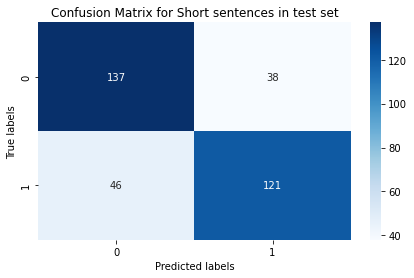

In [216]:
# Calculate and print evaluation metrics for short sentence
accuracy_short = accuracy_score(short_sentence["is_positive_sentiment"], short_sentence["prediction"])
precision_short = precision_score(short_sentence["is_positive_sentiment"], short_sentence["prediction"])
recall_short = recall_score(short_sentence["is_positive_sentiment"], short_sentence["prediction"])
f1_short = f1_score(short_sentence["is_positive_sentiment"], short_sentence["prediction"])
    
print(f"\nPerformance Metrics for Short sentences:")
print(f"Accuracy: {accuracy_short:.4f}, Precision: {precision_short:.4f}, Recall: {recall_short:.4f}, F1-score: {f1_short:.4f}")
    
# Plot the confusion matrix
plt.figure(figsize=(7, 4))
sns.heatmap(confusion_matrix(short_sentence["is_positive_sentiment"], short_sentence["prediction"]), annot=True, fmt="d", cmap='Blues')
plt.title(f'Confusion Matrix for Short sentences in test set')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()




Performance Metrics for long sentences:
Accuracy: 0.7480, Precision: 0.7845, Recall: 0.7000, F1-score: 0.7398


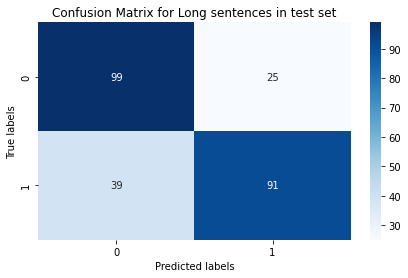

In [217]:
# Calculate and print evaluation metrics for long sentence
accuracy_long = accuracy_score(long_sentence["is_positive_sentiment"], long_sentence["prediction"])
precision_long = precision_score(long_sentence["is_positive_sentiment"], long_sentence["prediction"])
recall_long = recall_score(long_sentence["is_positive_sentiment"], long_sentence["prediction"])
f1_long = f1_score(long_sentence["is_positive_sentiment"], long_sentence["prediction"])
    
print(f"\nPerformance Metrics for long sentences:")
print(f"Accuracy: {accuracy_long:.4f}, Precision: {precision_long:.4f}, Recall: {recall_long:.4f}, F1-score: {f1_long:.4f}")
    
# Plot the confusion matrix
plt.figure(figsize=(7, 4))
sns.heatmap(confusion_matrix(long_sentence["is_positive_sentiment"], long_sentence["prediction"]), annot=True, fmt="d", cmap='Blues')
plt.title(f'Confusion Matrix for Long sentences in test set')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


In [218]:
#calculate total number of website review 
website_total=test_perf_df.groupby(['website_name'])['website_name'].count()
print(website_total)

website_name
amazon    199
imdb      200
yelp      199
Name: website_name, dtype: int64


In [219]:
#Answer question: does it do better on a particular kind of review (amazon,imdb,yelp)?

#website performace for test set
website_performance= test_perf_df.groupby(['website_name','correct/wrong prediction'])['correct/wrong prediction'].count()
percent_website_performance = (website_performance*100)/website_total

print(round(percent_website_performance),2)

website_name  correct/wrong prediction
amazon        correct                     77.0
              wrong                       23.0
imdb          correct                     72.0
              wrong                       28.0
yelp          correct                     75.0
              wrong                       25.0
dtype: float64 2


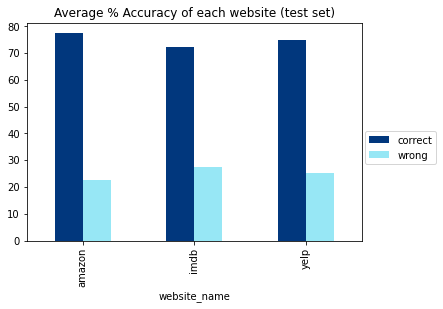

In [220]:
percent_website_performance.unstack().plot(kind="bar",color = ["#01377D","#97E7F5"],title="Average % Accuracy of each website (test set)")
plt.legend(loc=(1.01,.35))

In [221]:
#does it do better on sentences without negation words ("not", "didn't", "shouldn't", etc.)?

#exclude negative words
test_perf_df['contains_negative'] = test_perf_df['text'].apply(lambda x: any(word in x.lower() for word in negative_words))
no_negative_df =test_perf_df[~test_perf_df['contains_negative']]


In [222]:
no_negative_df.describe()

,is_positive_sentiment,prediction,word_lengths
count,527.000000,527.000000,529.000000
mean,0.537002,0.480076,11.294896
std,0.499103,0.500078,8.265023
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,5.000000
50%,1.000000,0.000000,9.000000
75%,1.000000,1.000000,16.000000
max,1.000000,1.000000,70.000000


In [223]:
website_total_pos=no_negative_df.groupby(['website_name'])['website_name'].count()
print(website_total_pos)

website_name
amazon    167
imdb      185
yelp      175
Name: website_name, dtype: int64


In [224]:
#website performance without negative words
website_performance_pos= no_negative_df.groupby(['website_name','correct/wrong prediction'])['correct/wrong prediction'].count()
percent_website_performance_pos = (website_performance_pos*100)/website_total_pos

print(round(percent_website_performance_pos,2))

website_name  correct/wrong prediction
amazon        correct                     77.84
              wrong                       22.16
imdb          correct                     71.89
              wrong                       28.11
yelp          correct                     74.86
              wrong                       25.14
dtype: float64


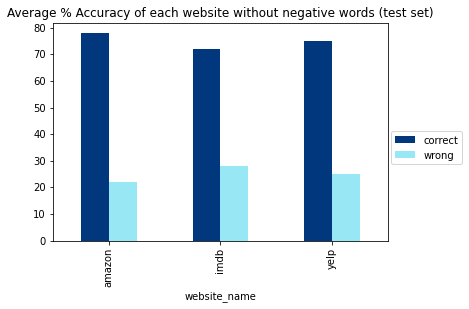

In [225]:
percent_website_performance_pos.unstack().plot(kind="bar",color = ["#01377D","#97E7F5"],title="Average % Accuracy of each website without negative words (test set)")
plt.legend(loc=(1.01,.35))